In [115]:
import pandas as pd

In [116]:
alex_prices = pd.read_csv("/kaggle/input/alex-5y-prices/Alexandria - 5Y.csv")

alex_prices = alex_prices[["year", "AVG price per metter  EGB"]]
alex_prices

,year,AVG price per metter EGB
0,2020,12340
1,2021,14526
2,2022,15671
3,2023,16914
4,2024,20289


In [117]:
alex_prices_2y = pd.read_csv("/kaggle/input/alex-2y/Alexandria - 2Y.csv")

def clean_prices(price):
    return price.replace(',', '').split(" ")[1]
years = alex_prices_2y.columns[2:]
for year in years:
    alex_prices_2y[year] = alex_prices_2y[year].apply(clean_prices)
    alex_prices_2y[year] = alex_prices_2y[year].astype(int)
alex_prices_2y

,Area,Bedrooms No.,Jul 2023,Jul 2024,Mar 2023,Mar 2024,Nov 2022,Nov 2023
0,Alexandria,1,22786,28289,21736,25577,20624,22508
1,Alexandria,2,15563,21708,13993,17998,14344,16882
2,Alexandria,3,15790,20724,14270,17540,14700,16187
3,Alexandria,4,15283,27014,15412,19871,14740,15457
4,Alexandria,5,16098,20276,14473,17044,16030,16996
5,Alexandria,6,22379,25233,21069,25233,20914,24770


In [118]:
alex_prices_2y = alex_prices_2y.T.loc[years].reset_index().rename(columns={'index': 'Date'})
alex_prices_2y

,Date,0,1,2,3,4,5
0,Jul 2023,22786,15563,15790,15283,16098,22379
1,Jul 2024,28289,21708,20724,27014,20276,25233
2,Mar 2023,21736,13993,14270,15412,14473,21069
3,Mar 2024,25577,17998,17540,19871,17044,25233
4,Nov 2022,20624,14344,14700,14740,16030,20914
5,Nov 2023,22508,16882,16187,15457,16996,24770


In [119]:
# alex_prices_recent = alex_prices_2y.T.loc[years].iloc[:, 1:-1]
# alex_prices_recent_mean = alex_prices_recent.T.mean().reset_index()

# alex_prices_recent_mean.columns = ["Date", "Price Per Meter"]
# alex_prices_recent_mean

In [120]:
alex_prices_2y['Date'] = pd.to_datetime(alex_prices_2y['Date'], format='%b %Y')
alex_prices_2y.to_csv("alex_2y.csv")
alex_prices_2y

,Date,0,1,2,3,4,5
0,2023-07-01,22786,15563,15790,15283,16098,22379
1,2024-07-01,28289,21708,20724,27014,20276,25233
2,2023-03-01,21736,13993,14270,15412,14473,21069
3,2024-03-01,25577,17998,17540,19871,17044,25233
4,2022-11-01,20624,14344,14700,14740,16030,20914
5,2023-11-01,22508,16882,16187,15457,16996,24770


In [121]:
alex_prices_2y['Date'] = pd.to_datetime(alex_prices_2y['Date'], format='%b %Y')
alex_prices_2y['Date'] = alex_prices_2y['Date'].dt.to_period('Q').astype(str)
alex_prices_2y

,Date,0,1,2,3,4,5
0,2023Q3,22786,15563,15790,15283,16098,22379
1,2024Q3,28289,21708,20724,27014,20276,25233
2,2023Q1,21736,13993,14270,15412,14473,21069
3,2024Q1,25577,17998,17540,19871,17044,25233
4,2022Q4,20624,14344,14700,14740,16030,20914
5,2023Q4,22508,16882,16187,15457,16996,24770


In [122]:
columns_to_update = alex_prices_2y.columns[1:] 

alex_prices_2y.rename(columns={col: str(col + 1) + '_bedroom' for col in columns_to_update}, inplace=True)

In [123]:
alex_prices_2y

,Date,1_bedroom,2_bedroom,3_bedroom,4_bedroom,5_bedroom,6_bedroom
0,2023Q3,22786,15563,15790,15283,16098,22379
1,2024Q3,28289,21708,20724,27014,20276,25233
2,2023Q1,21736,13993,14270,15412,14473,21069
3,2024Q1,25577,17998,17540,19871,17044,25233
4,2022Q4,20624,14344,14700,14740,16030,20914
5,2023Q4,22508,16882,16187,15457,16996,24770


In [124]:
alex_prices_5y = pd.read_csv("/kaggle/input/alex-5y-bedrooms/Alexandria - 5Y.csv")

alex_prices_5y = alex_prices_5y.iloc[:, 0:4]  
years = alex_prices_5y.columns[2:]
for year in years:
    alex_prices_5y[year] = alex_prices_5y[year].apply(clean_prices)
    alex_prices_5y[year] = alex_prices_5y[year].astype(int)
alex_prices_5y

,Area,Bedrooms No.,2020,2021
0,Alexandria,1,26758,21162
1,Alexandria,2,11241,10479
2,Alexandria,3,12730,13655
3,Alexandria,4,12382,13404
4,Alexandria,5,10828,15565
5,Alexandria,6,14519,19525


In [125]:
alex_prices_5y = alex_prices_5y.T.reset_index().iloc[-2:].rename(columns={'index': 'Date'})
alex_prices_5y

,Date,0,1,2,3,4,5
2,2020,26758,11241,12730,12382,10828,14519
3,2021,21162,10479,13655,13404,15565,19525


In [126]:
alex_prices_5y['Date'] = alex_prices_5y['Date'].astype(str) + 'Q4'

In [127]:
columns_to_update = alex_prices_5y.columns[1:] 

alex_prices_5y.rename(columns={col: str(col + 1) + '_bedroom' for col in columns_to_update}, inplace=True)
alex_prices_5y

,Date,1_bedroom,2_bedroom,3_bedroom,4_bedroom,5_bedroom,6_bedroom
2,2020Q4,26758,11241,12730,12382,10828,14519
3,2021Q4,21162,10479,13655,13404,15565,19525


In [128]:
quarters = pd.date_range(start='2020-01-01', end='2024-12-31', freq='Q')
quarters = pd.DataFrame({'Quarter': quarters})
quarters['Date'] = quarters['Quarter'].dt.to_period('Q')

In [129]:
merge_on = ['Date'] + [str(x) + "_bedroom" for x in range(1,7)]
q_prices = pd.merge(alex_prices_5y, alex_prices_2y, on=merge_on, how='outer')
q_prices.head()

,Date,1_bedroom,2_bedroom,3_bedroom,4_bedroom,5_bedroom,6_bedroom
0,2020Q4,26758,11241,12730,12382,10828,14519
1,2021Q4,21162,10479,13655,13404,15565,19525
2,2023Q3,22786,15563,15790,15283,16098,22379
3,2024Q3,28289,21708,20724,27014,20276,25233
4,2023Q1,21736,13993,14270,15412,14473,21069


In [130]:
quarters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Quarter  20 non-null     datetime64[ns]
 1   Date     20 non-null     period[Q-DEC] 
dtypes: datetime64[ns](1), period[Q-DEC](1)
memory usage: 448.0 bytes


In [131]:
q_prices['Date'] = pd.PeriodIndex(q_prices['Date'], freq='Q')
q_prices = pd.merge(q_prices, quarters, on='Date', how='outer')

In [132]:
q_prices = q_prices.sort_values(by='Date').reset_index(drop=True)
q_prices = q_prices.drop(["Quarter"], axis=1)
q_prices.head()

,Date,1_bedroom,2_bedroom,3_bedroom,4_bedroom,5_bedroom,6_bedroom
0,2020Q1,NaN,NaN,NaN,NaN,NaN,NaN
1,2020Q2,NaN,NaN,NaN,NaN,NaN,NaN
2,2020Q3,NaN,NaN,NaN,NaN,NaN,NaN
3,2020Q4,26758,11241,12730,12382,10828,14519
4,2021Q1,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
aqarmap_indx = pd.read_csv("/kaggle/input/aqarmap-price-index/aqarmap_price_index")
aqarmap_indx['Date'] = pd.to_datetime(aqarmap_indx['Year'].astype(str) + '-' + aqarmap_indx['Month'].astype(str))

aqarmap_indx = aqarmap_indx.groupby(aqarmap_indx['Date'].dt.to_period('Q'))['Points'].mean().reset_index()
aqarmap_indx.head()

,Date,Points
0,2012Q3,1756.000000
1,2012Q4,1721.333333
2,2013Q1,1757.000000
3,2013Q2,1572.500000
4,2013Q3,1721.000000


In [134]:
start_period = pd.Period('2017Q1', freq='Q')
end_period = pd.Period('2024Q4', freq='Q')

aqarmap_indx = aqarmap_indx[(aqarmap_indx['Date'] >= start_period) & (aqarmap_indx['Date'] <= end_period)].reset_index(drop=True)
aqarmap_indx.head()

,Date,Points
0,2017Q1,2664.666667
1,2017Q2,2522.000000
2,2017Q3,3046.666667
3,2017Q4,2926.500000
4,2018Q1,3000.500000


In [135]:
prices_points = pd.merge(q_prices, aqarmap_indx, on='Date', how='outer')
prices_points = prices_points.sort_values(by='Date').reset_index(drop=True)
prices_points = prices_points.drop_duplicates(subset='Date').reset_index(drop=True)
prices_points.head()

,Date,1_bedroom,2_bedroom,3_bedroom,4_bedroom,5_bedroom,6_bedroom,Points
0,2017Q1,NaN,NaN,NaN,NaN,NaN,NaN,2664.666667
1,2017Q2,NaN,NaN,NaN,NaN,NaN,NaN,2522.000000
2,2017Q3,NaN,NaN,NaN,NaN,NaN,NaN,3046.666667
3,2017Q4,NaN,NaN,NaN,NaN,NaN,NaN,2926.500000
4,2018Q1,NaN,NaN,NaN,NaN,NaN,NaN,3000.500000


In [136]:
alex_gdp = pd.read_csv("/kaggle/input/alex-gdp/GDP by Governorate.csv")

alex_gdp = alex_gdp[["Year", "Real Estate Ownership"]]
alex_gdp.head()

,Year,Real Estate Ownership
0,2021/2020,45997204.73
1,2020/2019,41842150.96
2,2019/2018,35029275.15
3,2018/2017,29389762.49
4,2017/2016,23802724.58


In [137]:
alex_gdp['Date'] = alex_gdp['Year'].apply(lambda x: f"{x.split('/')[1]}Q4")
alex_gdp = alex_gdp[["Date", "Real Estate Ownership"]]
alex_gdp = alex_gdp.head(4)
alex_gdp['Date'] = pd.PeriodIndex(alex_gdp['Date'], freq='Q-DEC')
alex_gdp

,Date,Real Estate Ownership
0,2020Q4,45997204.73
1,2019Q4,41842150.96
2,2018Q4,35029275.15
3,2017Q4,29389762.49


In [138]:
prices_points = pd.merge(prices_points, alex_gdp, on='Date', how='outer')

In [139]:
prices_points = prices_points.drop(prices_points.columns[[1, 6]], axis=1)

In [140]:
inflation_rate = pd.read_excel("/kaggle/input/inflation-rate/Inflations Historical.xlsx", header=1)
inflation_rate.head()

,Date,Headline (m/m),Core (m/m),Regulated Items (m/m),Fruits and Vegetables (m/m)
0,Nov 2024,0.520%,0.420%,3.800%,-7.580%
1,Oct 2024,1.104%,1.303%,1.330%,-1.420%
2,Sep 2024,2.081%,0.962%,2.789%,11.897%
3,Aug 2024,2.052%,0.938%,2.948%,12.344%
4,Jul 2024,0.395%,-0.490%,0.253%,12.778%


In [141]:
inflation_rate = inflation_rate[["Date", "Core (m/m)"]]
inflation_rate.columns = ["Date", "Inflation Rate"]
inflation_rate = inflation_rate.dropna()
inflation_rate["Inflation Rate"] = inflation_rate["Inflation Rate"].str.replace("%", "").astype(float)
inflation_rate['Date'] = pd.to_datetime(inflation_rate['Date'], format='%b %Y')
inflation_rate = inflation_rate.groupby(inflation_rate['Date'].dt.to_period('Q'))['Inflation Rate'].mean().reset_index()
inflation_rate = inflation_rate[(inflation_rate['Date'] >= start_period) & (inflation_rate['Date'] <= end_period)].reset_index(drop=True)
prices_points = pd.merge(prices_points, inflation_rate, on='Date', how='outer')

In [142]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
X = prices_points.drop('Date', axis=1)
prices_imputed = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

prices_imputed["Date"] = prices_points["Date"]
prices_imputed

,2_bedroom,3_bedroom,4_bedroom,5_bedroom,Points,Real Estate Ownership,Inflation Rate,Date
0,13239.705635,14725.683283,14995.585296,16057.594230,2664.666667,3.806460e+07,2.858000,2017Q1
1,12982.969406,14602.635845,14830.428485,16024.401052,2522.000000,3.806460e+07,1.627333,2017Q2
2,13927.120544,15055.153720,15437.796426,16146.473283,3046.666667,3.806460e+07,1.089667,2017Q3
3,13907.190024,15064.397873,12014.346851,19705.623278,2926.500000,2.938976e+07,0.548000,2017Q4
4,13844.040414,15015.335921,15384.351574,16135.732139,3000.500000,3.806460e+07,0.421000,2018Q1
5,14287.027184,15227.650763,15669.322509,16193.006326,3246.666667,3.806460e+07,1.416333,2018Q2
6,14213.843383,15192.576810,15622.244023,16183.544994,3206.000000,3.806460e+07,0.366667,2018Q3
7,13433.156539,14824.982169,13926.653800,17328.855143,2734.000000,3.502928e+07,0.469333,2018Q4
8,13017.757423,14619.311032,14852.807729,16028.899657,2541.333333,3.806460e+07,0.614333,2019Q1
9,13290.685955,14750.121397,15028.381310,16064.187308,2693.000000,3.806460e+07,0.625333,2019Q2


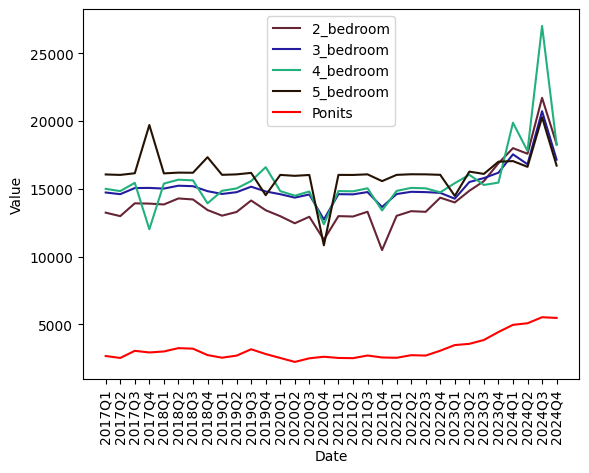

In [143]:
import matplotlib.pyplot as plt
import random

# Plot both lines
prices_imputed["Date"] = prices_imputed["Date"].astype(str)

for i in range(2,6):
    col = str(i) + "_bedroom"
    random_color = (random.random(), random.random(), random.random())  # RGB tuple
    plt.plot(prices_imputed["Date"], prices_imputed[col], label=col, color=random_color)
plt.plot(prices_imputed["Date"], prices_imputed["Points"], label='Ponits', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=90)

# Add legend
plt.legend()

In [144]:
prices_imputed.to_csv("alex_prices_2017_2024_bedrooms.csv")

In [145]:
prices = prices_points.drop("Date", axis=1)
prices.corr()

,2_bedroom,3_bedroom,4_bedroom,5_bedroom,Points,Real Estate Ownership,Inflation Rate
2_bedroom,1.000000,0.968656,0.909002,0.836172,0.973445,NaN,0.075784
3_bedroom,0.968656,1.000000,0.962195,0.896291,0.950249,NaN,-0.024258
4_bedroom,0.909002,0.962195,1.000000,0.817933,0.882101,NaN,0.022426
5_bedroom,0.836172,0.896291,0.817933,1.000000,0.805940,NaN,-0.024621
Points,0.973445,0.950249,0.882101,0.805940,1.000000,-0.807188,0.233877
Real Estate Ownership,NaN,NaN,NaN,NaN,-0.807188,1.000000,-0.087257
Inflation Rate,0.075784,-0.024258,0.022426,-0.024621,0.233877,-0.087257,1.000000


In [146]:
prices_points

,Date,2_bedroom,3_bedroom,4_bedroom,5_bedroom,Points,Real Estate Ownership,Inflation Rate
0,2017Q1,NaN,NaN,NaN,NaN,2664.666667,NaN,2.858000
1,2017Q2,NaN,NaN,NaN,NaN,2522.000000,NaN,1.627333
2,2017Q3,NaN,NaN,NaN,NaN,3046.666667,NaN,1.089667
3,2017Q4,NaN,NaN,NaN,NaN,2926.500000,29389762.49,0.548000
4,2018Q1,NaN,NaN,NaN,NaN,3000.500000,NaN,0.421000
5,2018Q2,NaN,NaN,NaN,NaN,3246.666667,NaN,1.416333
6,2018Q3,NaN,NaN,NaN,NaN,3206.000000,NaN,0.366667
7,2018Q4,NaN,NaN,NaN,NaN,2734.000000,35029275.15,0.469333
8,2019Q1,NaN,NaN,NaN,NaN,2541.333333,NaN,0.614333
9,2019Q2,NaN,NaN,NaN,NaN,2693.000000,NaN,0.625333
